In [1]:
import numpy as np
import pandas as pd
import sklearn
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV,train_test_split
import catboost as cb
from catboost import CatBoostClassifier,Pool
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.cluster import KMeans
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
pd.set_option('display.max_columns', None)

dtrain=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/train.csv")
season=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/season.csv")
dtest=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/test.csv")
dtrain

,yyyy,PerNo,PerStatus,sex,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A,出差數B,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,1.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,0.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,3.0,5.0,1.0,6.0,2.0,0.0,5.0,10.0,2.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,5.0,6.0,0.0,0.0,10.0,8.0,2.0,0.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
4,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,4.0,5.0,1.0,6.0,0.0,0.0,1.0,8.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,9.0,1.0,5.0,5.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14388,2015,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14389,2016,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14390,2017,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0


In [2]:
dtrain.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)
dtest.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)
season.rename(columns={'yyyy':'年份','PerNo':'個人編號','periodQ':'季'}, inplace=True)
def pro_key(df):
    key=[]
    for i in range(0,len(df)):
        key.append(i+1)
    df['流水號']=key
    return df
dtrain=pro_key(dtrain)
dtest=pro_key(dtest)

In [3]:
# leave percent
print('未離職', round(dtrain['離職與否'].value_counts()[0]/len(dtrain) * 100,2), '% of the dataset')
print('已離職', round(dtrain['離職與否'].value_counts()[1]/len(dtrain) * 100,2), '% of the dataset')

未離職 94.47 % of the dataset
已離職 5.53 % of the dataset


In [4]:
dtrain.isna().sum()

年份              0
個人編號            0
離職與否            0
性別             73
工作分類           73
職等             73
廠區代碼           73
管理層級           73
工作資歷1          73
工作資歷2          73
工作資歷3          73
工作資歷4          73
工作資歷5          73
專案時數           73
專案總數           73
當前專案角色         73
特殊專案佔比         73
工作地點           73
訓練時數A          73
訓練時數B          73
訓練時數C          73
生產總額           73
榮譽數            73
是否升遷           73
升遷速度           73
近三月請假數A        73
近一年請假數A        73
近三月請假數B        73
近一年請假數B        73
出差數A           73
出差數B           73
出差集中度          73
年度績效等級A        73
年度績效等級B        73
年度績效等級C        73
年齡層級           73
婚姻狀況           73
年資層級A          73
年資層級B          73
年資層級C          73
任職前工作平均年數      73
最高學歷         5326
畢業學校類別       3841
畢業科系類別         73
眷屬量            73
通勤成本           73
歸屬部門           73
流水號             0
dtype: int64

In [5]:
# del dtrain['最高學歷']
# find out rows which have nan values
nan_rows = dtrain[dtrain.isnull().any(1)]
nan_rows

,年份,個人編號,離職與否,性別,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A,出差數B,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門,流水號
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,1.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0,1
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,0.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,2
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,3.0,5.0,1.0,6.0,2.0,0.0,5.0,10.0,2.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,3
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,5.0,6.0,0.0,0.0,10.0,8.0,2.0,0.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,4
11,2017,7,0,0.0,1.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,2.0,1.0,3.0,6.0,0.0,0.0,2.0,10.0,2.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,NaN,NaN,5.0,0.0,10.0,4045.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14372,2015,8758,0,1.0,1.0,4.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,3.0,5.0,2.0,2.0,0.0,0.0,1.0,11.0,2.0,0.0,2.0,3.0,8.0,0.0,0.0,2.0,0.0,1.0,1.0,4.0,5.0,7.0,1.0,2.0,1.0,1.0,1.0,NaN,4.0,7.0,2.0,9.0,14053.0,14373
14373,2016,8758,0,1.0,1.0,4.0,13.0,4.0,0.0,0.0,0.0,0.0,0.0,22.0,2.0,5.0,0.0,6.0,1.0,0.0,2.0,11.0,2.0,0.0,2.0,4.0,8.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,5.0,8.0,1.0,2.0,2.0,1.0,1.0,NaN,4.0,7.0,2.0,8.0,13159.0,14374
14374,2017,8758,1,1.0,1.0,4.0,13.0,4.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,6.0,1.0,0.0,2.0,9.0,1.0,0.0,2.0,2.0,7.0,0.0,0.0,3.0,0.0,5.0,2.0,8.0,5.0,8.0,1.0,2.0,2.0,1.0,1.0,NaN,4.0,7.0,2.0,8.0,13159.0,14375
14375,2017,8761,0,1.0,1.0,7.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,2.0,5.0,0.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,7.0,0.0,0.0,1.0,0.0,0.0,10.0,7.0,2.0,6.0,2.0,1.0,1.0,1.0,1.0,2.0,NaN,5.0,0.0,8.0,20123.0,14376


In [6]:
# 這些類別標籤是1好還是2好
# 為何null都是73筆?選取為null的資料
# 工作資歷1-5似乎是one-hot encoding
# 將perNo一樣的groupby?參考season
# selectkbest=>model=>pipeline合併二者=>fit,predict


In [7]:
feature_names=[c for c in dtrain.columns if c not in ['離職與否']]

columns_names=dtrain.columns.tolist()

dtrain.fillna(-1,inplace=True)
dtrain=dtrain.astype(float).astype(int)

leave_df = dtrain.loc[dtrain['離職與否'] == 1]
uni=[]
for col in columns_names:
    uni.append(dtrain[col].unique())

uni_len=[]

df_values_counts=[]
leave_df_values_counts=[]

# uni_len 
for i in range(len(uni)):
    uni_len.append(len(uni[i]))

for col in dtrain:
    if len(col)>=10:
        df_values_counts.append(dtrain[col].value_counts()[:10].to_dict())
        leave_df_values_counts.append(leave_df[col].value_counts()[:10].to_dict())
    else:
        df_values_counts.append(dtrain[col].value_counts()[:len(col)].to_dict())
        leave_df_values_counts.append(leave_df[col].value_counts()[:len(col)].to_dict())

dtrain_details = pd.DataFrame({
    'columns_names':columns_names,
    'uni_len':uni_len,
    'df_value_counts':df_values_counts,
    'leave_df_value_counts':leave_df_values_counts
    })

dtrain_details

,columns_names,uni_len,df_value_counts,leave_df_value_counts
0,年份,4,"{2017: 3674, 2016: 3638}","{2014: 238, 2016: 200}"
1,個人編號,4600,"{4094: 4, 5057: 4, 3002: 4, 947: 4}","{4095: 1, 6161: 1, 4757: 1, 4754: 1}"
2,離職與否,2,"{0: 13596, 1: 796}",{1: 796}
3,性別,3,"{1: 10042, 0: 4277}","{1: 639, 0: 154}"
4,工作分類,3,"{1: 12753, 2: 1566, -1: 73}","{1: 754, 2: 39, -1: 3}"
5,職等,9,"{4: 5902, 7: 3812}","{4: 323, 7: 256}"
6,廠區代碼,16,"{8: 2731, 20: 2477, 14: 2319, 13: 1468}","{20: 157, 8: 118, 14: 98, 13: 89}"
7,管理層級,7,"{1: 10982, 4: 1761, 6: 930, 2: 242}","{1: 615, 4: 120, 6: 38, 5: 9}"
8,工作資歷1,3,"{0: 13902, 1: 417, -1: 73}","{0: 753, 1: 40, -1: 3}"
9,工作資歷2,3,"{0: 13578, 1: 741, -1: 73}","{0: 748, 1: 45, -1: 3}"


In [51]:
percent = lambda x: x.count()/dtrain.shape[0]
# 性別=1的離職率普遍高
dtrain.pivot_table(values='離職與否', index='性別', columns='年份',aggfunc=[percent,'sum'])

<lambda>                                sum               
年份      2014      2015      2016      2017 2014 2015 2016 2017
性別                                                            
-1  0.001181  0.001320  0.001181  0.001390    0    2    0    1
 0  0.070734  0.072957  0.074694  0.078794   45   27   41   41
 1  0.171206  0.174541  0.176904  0.175097  193  154  159  133

In [52]:
# 是否升遷=1時，升遷速度必定為1，推測原編碼 有升遷=0，沒升遷=1，交換兩者改為 有升遷=1，沒升遷=0

dtrain['是否升遷']=dtrain['是否升遷'].map({1:0,0:1,-1:-1})

In [53]:
c=dtrain.pivot_table(values='離職與否',index=['年資層級A'] ,columns='歸屬部門', aggfunc=[percent])
c

<lambda>                                                              \
歸屬部門     -1         2029      2058      2098      2101      2128      2149    
年資層級A                                                                         
-1     0.005072       NaN       NaN       NaN       NaN       NaN       NaN   
 1          NaN  0.000278  0.001737  0.000208  0.001112       NaN       NaN   
 2          NaN  0.000903  0.006323  0.000695  0.002501  0.000695  0.000417   
 3          NaN  0.000417  0.006115  0.000834  0.003335  0.001320  0.001112   
 4          NaN  0.000764  0.003961  0.000973  0.002640  0.000764  0.000903   
 5          NaN  0.000417  0.001320  0.000347  0.000278  0.000208  0.000347   
 6          NaN  0.000695  0.002293       NaN       NaN       NaN  0.000347   
 7          NaN  0.000347  0.001042       NaN       NaN  0.000069       NaN   
 8          NaN  0.000139  0.000139       NaN       NaN       NaN       NaN   
 9          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                                                                             \
歸屬部門      2169      2177      2180      2185      2197      4010      4045    
年資層級A                                                                         
-1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 1     0.000139  0.000347  0.000069       NaN  0.000625  0.000417  0.000695   
 2     0.000347  0.000695  0.000486  0.000139  0.005837  0.001251  0.001807   
 3     0.000903  0.001251  0.001807  0.000208  0.009172  0.002362  0.001251   
 4     0.000973  0.000834  0.002084       NaN  0.005142  0.001112  0.001668   
 5     0.000139  0.000417  0.001807  0.000139  0.001598  0.001598  0.001529   
 6     0.000069  0.000278  0.000486  0.000278  0.001946  0.001320  0.001181   
 7     0.000347  0.000139  0.000208       NaN  0.000973  0.000208  0.000417   
 8          NaN       NaN       NaN       NaN       NaN  0.000069  0.000208   
 9          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                                                                             \
歸屬部門      4073      4125      4131      4190      5027      5103      5163    
年資層級A                                                                         
-1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 1          NaN  0.001042       NaN       NaN  0.000278  0.000069       NaN   
 2     0.000278  0.001807  0.000069       NaN  0.001112  0.000973  0.000486   
 3     0.000556  0.000764  0.000208  0.000139  0.002293  0.000347  0.000903   
 4     0.000069  0.001737  0.000347  0.000069  0.000834  0.000486  0.000834   
 5     0.000556  0.001320  0.000208  0.000069  0.000208  0.000139  0.000139   
 6     0.000834  0.000625  0.000139       NaN       NaN  0.000139       NaN   
 7     0.000139  0.000417  0.000069       NaN       NaN       NaN       NaN   
 8          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 9          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                                                                             \
歸屬部門      6024      6167      6170      6171      8012      8018      8028    
年資層級A                                                                         
-1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 1     0.000903  0.000486  0.000486       NaN  0.001042       NaN  0.000695   
 2     0.000695  0.000278  0.000139  0.000069  0.003057  0.000208  0.002988   
 3     0.000069  0.000208  0.000139  0.000069  0.003891       NaN  0.002571   
 4     0.000069  0.000278  0.000278  0.000139  0.002293       NaN  0.002501   
 5          NaN  0.000139  0.000069  0.000139  0.001737  0.000278  0.003127   
 6          NaN       NaN  0.000069  0.000069  0.003752       NaN  0.002084   
 7          NaN  0.000069       NaN       NaN  0.001668  0.000139  0.000486   
 8          NaN       NaN       NaN       NaN  0.00034

<AxesSubplot:xlabel='年資層級A'>

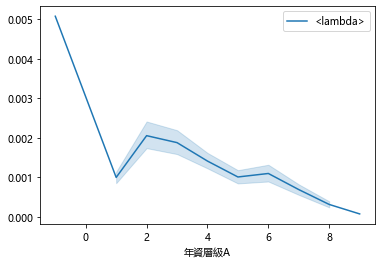

In [54]:
# 年資層級Null的容易離職，2的離職率較高
sns.lineplot(data=c)

In [55]:
# 是否升遷為null/0時升遷速度必定為null/1，升遷速度1~4時離職率高
dtrain.pivot_table( values=['離職與否'] ,index='是否升遷',columns='升遷速度',aggfunc=[percent,'sum'])

<lambda>                                                              \
          離職與否                                                               
升遷速度       -1         1         2         3         4         5         6    
是否升遷                                                                         
-1    0.005072       NaN       NaN       NaN       NaN       NaN       NaN   
 0         NaN  0.070317       NaN       NaN       NaN       NaN       NaN   
 1         NaN  0.229641  0.343246  0.133685  0.086298  0.064272  0.041968   

                                              sum                            \
                                             離職與否                             
升遷速度        7         8         9         10  -1      1      2     3     4    
是否升遷                                                                          
-1         NaN       NaN       NaN       NaN  3.0    NaN    NaN   NaN   NaN   
 0         NaN       NaN       NaN       NaN  NaN   57.0    NaN   NaN   NaN   
 1    0.017579  0.006184  0.001668  0.000069  NaN  289.0  273.0  81.0  45.0   

                                      
                                      
升遷速度    5     6    7    8    9    10  
是否升遷                                  
-1     NaN   NaN  NaN  NaN  NaN  NaN  
 0     NaN   NaN  NaN  NaN  NaN  NaN  
 1    22.0  14.0  8.0  3.0  1.0  0.0

In [56]:
# 職等Null+管理層級Null可能是約聘or臨時工，大多數人落在4職等、7職等、3職等+ 1管理層級
dtrain.pivot_table(values='離職與否',index='職等', columns='管理層級', aggfunc=[percent, 'sum','count'])


<lambda>                                                              \
管理層級        -1         1         2         3         4         5         6   
職等                                                                           
-1    0.005072       NaN       NaN       NaN       NaN       NaN       NaN   
 1         NaN  0.024666       NaN       NaN       NaN       NaN       NaN   
 2         NaN  0.005976  0.012924  0.013758  0.022929  0.000417  0.014383   
 3         NaN  0.094983  0.003127  0.001251  0.067051  0.008199  0.044122   
 4         NaN  0.369441  0.000139       NaN  0.030712  0.003683  0.006115   
 5         NaN  0.002918       NaN       NaN       NaN       NaN       NaN   
 6         NaN  0.000139  0.000625  0.000695  0.000208       NaN       NaN   
 7         NaN  0.263341       NaN       NaN  0.001459  0.000069       NaN   
 8         NaN  0.001598       NaN       NaN       NaN       NaN       NaN   

      sum                                   count                        \
管理層級   -1      1    2    3     4    5     6    -1       1      2      3   
職等                                                                        
-1    3.0    NaN  NaN  NaN   NaN  NaN   NaN  73.0     NaN    NaN    NaN   
 1    NaN   10.0  NaN  NaN   NaN  NaN   NaN   NaN   355.0    NaN    NaN   
 2    NaN    3.0  5.0  4.0  20.0  0.0   5.0   NaN    86.0  186.0  198.0   
 3    NaN   59.0  2.0  0.0  72.0  5.0  28.0   NaN  1367.0   45.0   18.0   
 4    NaN  291.0  0.0  NaN  24.0  3.0   5.0   NaN  5317.0    2.0    NaN   
 5    NaN    1.0  NaN  NaN   NaN  NaN   NaN   NaN    42.0    NaN    NaN   
 6    NaN    0.0  0.0  0.0   0.0  NaN   NaN   NaN     2.0    9.0   10.0   
 7    NaN  251.0  NaN  NaN   4.0  1.0   NaN   NaN  3790.0    NaN    NaN   
 8    NaN    0.0  NaN  NaN   NaN  NaN   NaN   NaN    23.0    NaN    NaN   

                           
管理層級      4      5      6  
職等                         
-1      NaN    NaN    NaN  
 1      NaN    NaN    NaN  
 2    330.0    6.0  207.0  
 3    965.0  118.0  635.0  
 4    442.0   53.0   88.0  
 5      NaN    NaN    NaN  
 6      3.0    NaN    NaN  
 7     21.0    1.0    NaN  
 8      NaN    NaN    NaN

In [57]:
# 年齡6 + 年資3 、年齡5 + 年資2 、年齡4 + 年資2
dtrain.pivot_table(values='離職與否',index=['年資層級A'] ,columns='年齡層級', aggfunc=[percent, 'sum'])

<lambda>                                                              \
年齡層級        -1         2         3         4         5         6         7    
年資層級A                                                                         
-1     0.005072       NaN       NaN       NaN       NaN       NaN       NaN   
 1          NaN  0.017301  0.031337  0.019247  0.019872  0.004794  0.000347   
 2          NaN       NaN  0.016745  0.064063  0.074208  0.048360  0.018482   
 3          NaN       NaN       NaN  0.001042  0.042663  0.081365  0.058018   
 4          NaN       NaN       NaN  0.000069  0.000278  0.012298  0.048221   
 5          NaN       NaN       NaN       NaN       NaN  0.000208  0.004169   
 6          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 7          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 8          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 9          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                                                                   sum        \
年齡層級         8         9         10        11        12        13  -1     2    
年資層級A                                                                          
-1          NaN       NaN       NaN       NaN       NaN       NaN  3.0   NaN   
 1     0.000417       NaN       NaN       NaN       NaN       NaN  NaN  58.0   
 2     0.004516  0.001181       NaN       NaN       NaN       NaN  NaN   NaN   
 3     0.020984  0.005906  0.002293  0.000903  0.000417       NaN  NaN   NaN   
 4     0.052112  0.028974  0.011743  0.003891  0.001112  0.000278  NaN   NaN   
 5     0.018205  0.037590  0.033213  0.014452  0.006323  0.000347  NaN   NaN   
 6     0.000486  0.008963  0.030712  0.047110  0.025639  0.004030  NaN   NaN   
 7          NaN  0.000139  0.003057  0.012993  0.032310  0.009728  NaN   NaN   
 8          NaN       NaN  0.000208  0.001598  0.005628  0.004308  NaN   NaN   
 9          NaN       NaN       NaN       NaN       NaN  0.000069  NaN   NaN   

                                                                        
年齡層級     3     4     5     6     7     8     9     10    11    12   13  
年資層級A                                                                   
-1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  
 1     70.0  37.0  34.0   5.0   0.0   0.0   NaN   NaN   NaN   NaN  NaN  
 2     23.0  78.0  73.0  45.0  18.0   2.0   2.0   NaN   NaN   NaN  NaN  
 3      NaN   0.0  32.0  57.0  45.0  20.0   6.0   0.0   0.0   1.0  NaN  
 4      NaN   0.0   0.0   5.0  15.0  22.0  13.0   6.0   3.0   1.0  0.0  
 5      NaN   NaN   NaN   0.0   0.0   6.0  15.0  16.0   3.0   1.0  0.0  
 6      NaN   NaN   NaN   NaN   NaN   0.0   5.0   6.0  20.0  18.0  1.0  
 7      NaN   NaN   NaN   NaN   NaN   NaN   0.0   1.0   5.0  16.0  7.0  
 8      NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   2.0  0.0  
 9      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.0

In [58]:
# 生產總額 8 以上離職率低，
b=dtrain.pivot_table(values='離職與否',index=['年資層級A'] ,columns='生產總額', aggfunc=[percent])
b

<lambda>                                                              \
生產總額       -1         0         1         2         3         4         5     
年資層級A                                                                         
-1     0.005072       NaN       NaN       NaN       NaN       NaN       NaN   
 1          NaN  0.002640  0.011048  0.011187  0.008268  0.008616  0.007643   
 2          NaN  0.009033  0.019733  0.019664  0.022513  0.018344  0.017649   
 3          NaN  0.018691  0.026195  0.020220  0.021957  0.019247  0.015495   
 4          NaN  0.018482  0.023972  0.016120  0.014869  0.013758  0.010353   
 5          NaN  0.018344  0.017162  0.013549  0.010631  0.008199  0.007087   
 6          NaN  0.022096  0.020567  0.012576  0.011048  0.009797  0.006253   
 7          NaN  0.014869  0.012785  0.007087  0.005420  0.002779  0.002988   
 8          NaN  0.002918  0.002779  0.001876  0.001112  0.000556  0.000764   
 9          NaN       NaN       NaN  0.000069       NaN       NaN       NaN   

                                                                             \
生產總額        6         7         8         9         10        11        12    
年資層級A                                                                         
-1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 1     0.006392  0.006115  0.005906  0.003683  0.003822  0.002362  0.002432   
 2     0.016676  0.012854  0.011048  0.009519  0.008546  0.008268  0.007782   
 3     0.011534  0.011812  0.009589  0.007504  0.006879  0.005211  0.005072   
 4     0.010006  0.007643  0.005698  0.004308  0.004099  0.005350  0.003335   
 5     0.006115  0.004169  0.003613  0.003405  0.002988  0.002293  0.002362   
 6     0.005906  0.004238  0.003405  0.002779  0.002432  0.001459  0.001320   
 7     0.002154  0.002084  0.001946  0.000834  0.000625  0.000625  0.000486   
 8     0.000208  0.000486  0.000347  0.000278  0.000139       NaN       NaN   
 9          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                                                                             \
生產總額        13        14        15        16        17        18        19    
年資層級A                                                                         
-1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 1     0.002223  0.002015  0.001042  0.001529  0.000695  0.000764  0.000556   
 2     0.006184  0.004516  0.004377  0.003752  0.003683  0.001946  0.002154   
 3     0.004516  0.003266  0.002710  0.002154  0.002154  0.001876  0.002154   
 4     0.002571  0.002223  0.002084  0.001598  0.001390  0.001529  0.000903   
 5     0.002015  0.001390  0.000486  0.001042  0.001251  0.000764  0.000625   
 6     0.001459  0.001251  0.001112  0.000903  0.000764  0.000486  0.000486   
 7     0.000556  0.000417  0.000139  0.000208  0.000347  0.000139  0.000278   
 8          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 9          NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                                                                             \
生產總額        20        21        22        23        24        25        26    
年資層級A                                                                         
-1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
 1     0.000625  0.000556  0.000069  0.000347  0.000069  0.000069  0.000347   
 2     0.002362  0.001042  0.001459  0.001737  0.001320  0.000764  0.001181   
 3     0.001876  0.001737  0.001181  0.000903  0.000764  0.000973  0.000903   
 4     0.000903  0.000556  0.000556  0.000625  0.000486  0.000278  0.000347   
 5     0.000278  0.000486  0.000486  0.000347  0.000139  0.000139  0.000208   
 6     0.000486  0.000208  0.000347  0.000139  0.000208  0.000208  0.000347   
 7          NaN  0.000208  0.000347       NaN  0.000069  0.000069  0.000069   
 8          NaN       NaN  0.000069       NaN       Na

In [59]:
# from sklearn.decomposition import PCA
# # after 
# pca = PCA(n_components=2)
# pca_X_train=pca.fit_transform(X_train)

# # plot 2D
# plt.figure(figsize=(8,6))
# plt.scatter(pca_X_train[:,0],pca_X_train[:,1],c= y_train,cmap='rainbow')
# plt.xlabel('First principal component')
# plt.ylabel('Second Principal Component')

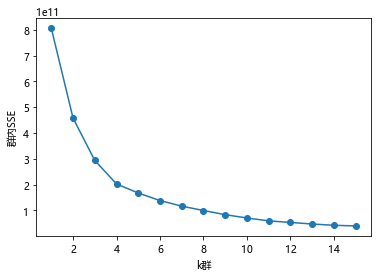

In [60]:
from sklearn.cluster import KMeans

SSE = []  # 存放每次结果

for k in range(1,16):
    # k-means
    estimator = KMeans(n_clusters=k)  
    estimator.fit(dtrain)
    SSE.append(estimator.inertia_)
    
X = range(1,16)
plt.xlabel('k群')
plt.ylabel('群內SSE')
plt.plot(X,SSE,'o-')
plt.show()


In [61]:
# add columns of clustering 
# k_dtrain2 = KMeans(n_clusters=2, random_state=0).fit(dtrain)
k_dtrain3 = KMeans(n_clusters=3, random_state=0).fit(dtrain)
k_dtrain4 = KMeans(n_clusters=4, random_state=0).fit(dtrain)

# dtrain['分2群']=k_dtrain2.labels_.tolist()
dtrain['分3群']=k_dtrain3.labels_.tolist()
dtrain['分4群']=k_dtrain4.labels_.tolist()

In [62]:
# DBSCAN
# from sklearn.cluster import DBSCAN
# cluster_dtrain = DBSCAN(eps=0.5, min_samples=10, metric='euclidean', 
#                         metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(dtrain)
# cluster_dtrain.labels_

# # function to get unique values 
# def unique(list1): 
  
#     # intilize a null list 
#     unique_list = [] 
      
#     # traverse for all elements 
#     for x in list1: 
#         # check if exists in unique_list or not 
#         if x not in unique_list: 
#             unique_list.append(x) 
#     # print list 
#     for x in unique_list: 
#         print (x)
        
# unique(cluster_dtrain.labels_)

In [ ]:
cat_features=[c for c in dtrain.columns if c not in ['年份','離職與否','流水號']]

cols=[c for c in dtrain.columns if c not in '離職與否','流水號']
X_train, X_valid, y_train, y_valid = train_test_split(dtrain[cols], dtrain['離職與否'], stratify= dtrain['離職與否'],
                                                      test_size=0.3, random_state=777)

# dtrain_pool=Pool(data=dtrain,label=dtrain['離職與否'],cat_features=cat_features)
# train
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
# validation
validate_pool = Pool(data=X_valid, label=y_valid, cat_features=cat_features)

In [ ]:
%%time

cat1 = CatBoostClassifier(
                           learning_rate=0.1,
                           n_estimators=500,
                           eval_metric='AUC',
                           task_type="GPU"
                           
)
# we don't need to specify this parameter as pool object contains info about categorical features
cat1.fit(train_pool,  eval_set=validate_pool,verbose=True,use_best_model=True)

In [ ]:
feature_importances = cat1.get_feature_importance(data=train_pool,prettified=True)

plt.figure(figsize=(20, 30))
ax = sns.barplot(data=feature_importances, x='Importances', y='Feature Id')
plt.title('Feature_Importances (Baseline)')
plt.savefig("C:/Users/T160/pythonworks/aidea_leave_job/feature importance/Feature_Importances (Baseline).png")

In [ ]:
# categorical=[c for c in dtrain.columns if c not in ['個人編號','年份','離職與否']]
# dtrain.fillna(0,inplace=True)

# dtrain=dtrain.astype(float).astype(int)
dtrain['總工作資歷']=dtrain['工作資歷1']+dtrain['工作資歷2']+dtrain['工作資歷3']+dtrain['工作資歷4']+dtrain['工作資歷5']
dtrain['總訓練時數']=dtrain['訓練時數A']+dtrain['訓練時數B']+dtrain['訓練時數C']
dtrain['近三月請假總數']=dtrain['近三月請假數A']+dtrain['近三月請假數B']
dtrain['近一年請假總數']=dtrain['近一年請假數A']+dtrain['近一年請假數B']
dtrain['出差總數']=dtrain['出差數A']+dtrain['出差數B']
dtrain['年度績效等級ABC']=dtrain['年度績效等級A']+dtrain['年度績效等級B']+dtrain['年度績效等級C']
dtrain['年資層級ABC']=dtrain['年資層級A']+dtrain['年資層級B']+dtrain['年資層級C']

dtrain['編號出現年份']=dtrain.groupby(['年份','個人編號'])['流水號'].transform('count')
dtrain['是否升遷x升遷速度']=dtrain['是否升遷']*dtrain['升遷速度']
dtrain['部門人數']=dtrain.groupby(['歸屬部門'])['流水號'].transform('count')
dtrain['畢業學校類別人數']=dtrain.groupby(['畢業學校類別'])['流水號'].transform('count')


# dtrain=dtrain.astype(float).astype(int).astype(str)
dtrain=dtrain.astype(str)

cols=[c for c in dtrain.columns if c not in '離職與否']
X_train, X_valid, y_train, y_valid = train_test_split(dtrain[cols], dtrain['離職與否'], test_size=0.3,
                                                      stratify=dtrain['離職與否'], random_state=777)


In [67]:
# season outer join?groupby

season_noQ=season
# del season_noQ['季']
season_noQ=season_noQ.astype(str).astype(int)
season_noQ.groupby(['年份','個人編號']).sum()
# merge on 年份 個人編號 drop 流水號
dtrains=pd.merge(dtrain,season,how='outer',on=['年份','個人編號'])

In [68]:
dtrains

,年份,個人編號,離職與否,性別,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A_x,出差數B_x,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門,流水號_x,分3群,分4群,加班數,出差數A_y,出差數B_y,請假數A,請假數B,流水號_y
0,2014,1,0.0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,0.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,-1.0,5.0,0.0,8.0,19138.0,1.0,2.0,3.0,0,8,0,1,0,1
1,2014,1,0.0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,0.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,-1.0,5.0,0.0,8.0,19138.0,1.0,2.0,3.0,2,5,0,1,0,3514
2,2014,1,0.0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,0.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,-1.0,5.0,0.0,8.0,19138.0,1.0,2.0,3.0,0,4,0,3,0,7027
3,2014,1,0.0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,0.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,-1.0,5.0,0.0,8.0,19138.0,1.0,2.0,3.0,1,4,0,3,0,10540
4,2015,1,0.0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,1.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,-1.0,5.0,2.0,8.0,19138.0,2.0,2.0,3.0,1,3,0,3,0,14053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72679,2018,8774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2,0,72683
72680,2018,8775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7,0,1,0,61467
72681,2018,8775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6,0,4,0,65206
72682,2018,8775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6,1,2,0,68945


In [34]:
season['PerNo'].value_counts()

4094    20
7007    20
1564    20
3357    20
1308    20
        ..
6038     4
8087     4
8151     4
2260     4
7964     4
Name: PerNo, Length: 4987, dtype: int64

In [ ]:
import seaborn as sns
def feature_importances(df, model):
    max_num_features=100
    feature_importances = pd.DataFrame(columns = ['feature', 'importance'])
    feature_importances['feature'] = df.columns
    feature_importances['importance'] = model.feature_importances_
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    feature_importances = feature_importances[:max_num_features]
    plt.figure(figsize=(20, 30));
    sns.barplot(x="importance", y="feature", data=feature_importances);
    plt.title('CatBoost features importance');
    
feature_importances(X_train, cat)

In [ ]:
leave_df = dtrain.loc[dtrain['離職與否']=='1']
leave_df

In [ ]:
# 訓練時數
dtrain['個人編號']


In [ ]:
# confusion matrix


In [ ]:
# unique values


In [ ]:
# 歸屬部門離職率


In [ ]:
# 生產總額圖


In [ ]:
# 近一年請假數A


In [ ]:
# 年資層級A


In [ ]:
train_no=dtrain['個人編號'].tolist()
test_no=dtest['個人編號'].tolist()

accordance_ratio=len(set(train_no) & set(test_no))/len(test_no)
# Do not drop perNo
print(accordance_ratio)